In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from scipy import stats
from scipy.optimize import minimize
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

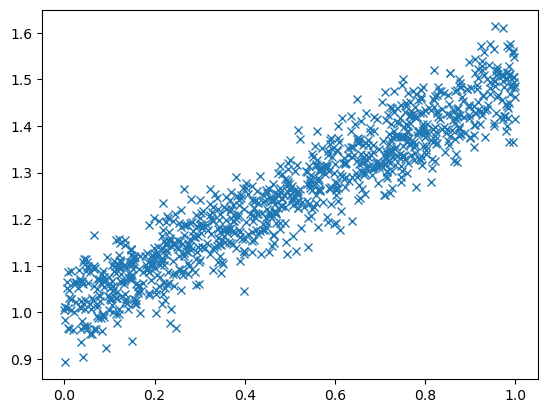

In [2]:
# establish data generation and have a look at the synthetic data

n = 1000 # number of data points in sample
x = stats.uniform(0, 1).rvs(n) # n random variables from uniform distribution

a = 0.5
b = 1
sigma_y = 0.05

y = a*x + b + stats.norm(0, sigma_y).rvs(n) # linear function of x with a gaussian error of width sigma_y

plt.plot(x, y, 'x')

$$ \begin{aligned}
&\text{We have} \\
 &\chi^2 = \sum_{i}^{N}\frac{\left(y_i - f(x_i)\right)^2}{\sigma_y^2} = \sum_{i}^{N}\frac{\left(y_i - ax_i-b\right)^2}{\sigma_y^2} \\
 &\text{can also be written as} \\
 &\chi^2 = \sum_{i}^{N}\frac{(y_i-b)^2 +a^2x_i^2 -2(y_i-b)(ax_i)}{\sigma_y^2} = \sum_{i}^{N}\frac{(y_i-ax_i)^2 +b^2 -2b(y_i-ax_i)}{\sigma_y^2} \\
 &\text{Then, to minimize $\chi^2$, We set } \frac{\partial \chi^2}{\partial a} = \frac{\partial \chi^2}{\partial b} = 0 \\
 \implies & a = \frac{\sum_{i}^{N}x_i(y_i-b)}{\sum_{i}^{N}x_i^2} \quad 
 ; \quad b = \frac{1}{N} \left(\sum_{i}^{N} y_i -ax_i \right) = \bar y -a\bar x\\
 &\text{substituting b in a, we get} \\
 \implies & a = \frac{\sum_{i}^{N}x_i(y_i-\bar{y})}{\sum_{i}^{N}x_i(x_i-\bar{x})}
\end{aligned} $$

In [3]:
def analytical_minimizer(x,y):
    a = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
    b = np.mean(y) - a*np.mean(x)
    return a, b

In [4]:
# define the proper functions and test if everything works

def generate_data(n, a, b, sigma_x, sigma_y):
    x = stats.uniform(0, 1).rvs(n) + stats.norm(0, sigma_x).rvs(n)
    y = a*x + b + stats.norm(0, sigma_y).rvs(n)
    return x, y

a, b, sigma_x, sigma_y = 0.5, 1, 0, 0.05 # for the first part sigma_x = 0

x_, y_ = generate_data(10, a, b, sigma_x, sigma_y)

def Chi2(params, x_,y_, sigma_y):
    return np.sum(((y_ - params[0]*x_ - params[1])/sigma_y)**2)

print(f"Numerical Result: a = {minimize(Chi2, x0=(0, 0), args = (x_, y_, sigma_y)).x[0]:2.2f}, b = {minimize(Chi2, x0=(0, 0), args = (x_, y_, sigma_y)).x[1]:2.2f}", )
print(f"Analytical Result: a = {analytical_minimizer(x_, y_)[0]:2.2f}, b = {analytical_minimizer(x_, y_)[1]:2.2f}")

Numerical Result: a = 0.49, b = 1.02
Analytical Result: a = 0.49, b = 1.02


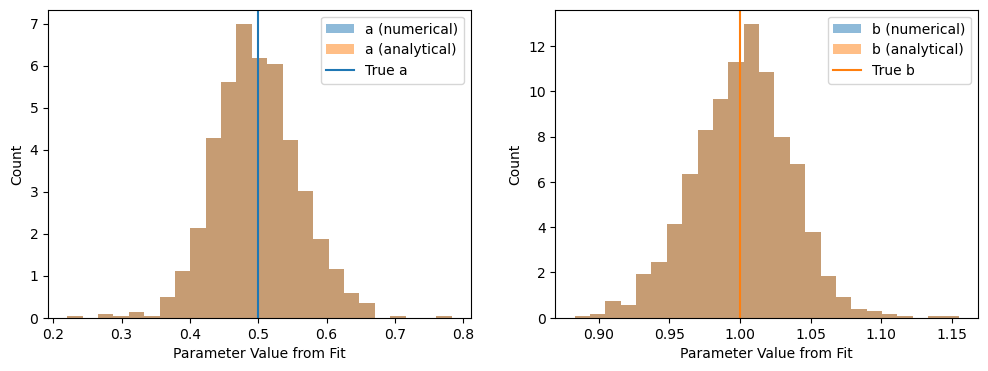

from estimator (numerical): a = 0.50 +/- 0.06
from estimator (numerical): b = 1.00 +/- 0.03
from estimator (analytical): a = 0.50 +/- 0.06
from estimator (analytical): b = 1.00 +/- 0.03
bias of a (numerical): -2.19e-03; analytical: -2.19e-03
bias of b (numerical): 1.30e-03; analytical: 1.30e-03


In [5]:
n_experiments = 1000
n = 10

a_values = np.zeros(n_experiments)
b_values = np.zeros(n_experiments)
a_values_ana = np.zeros(n_experiments)
b_values_ana = np.zeros(n_experiments)

a, b, sigma_x,sigma_y = 0.5, 1, 0, 0.05 # for the first part sigma_x = 0


for i in range(n_experiments):
    x_, y_ = generate_data(10, a, b, sigma_x, sigma_y) # generate samples of n points 
    a_values[i], b_values[i] = minimize(Chi2, x0=(0, 0), args = (x_, y_, sigma_y)).x # find the best fit parameters for a and b
    a_values_ana[i], b_values_ana[i] = analytical_minimizer(x_, y_) # find the best fit parameters for a and b analytically
    
# plot the distribution of estimated a and b values
n_bins = 25

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(a_values, bins=n_bins, density=True, alpha=0.5, label='a (numerical)')
axs[0].hist(a_values_ana, bins=n_bins, density=True, alpha=0.5, label='a (analytical)')
axs[0].axvline(a, color='C0', label='True a')
axs[0].legend()
axs[1].hist(b_values, bins=n_bins, density=True, alpha=0.5, label='b (numerical)')
axs[1].hist(b_values_ana, bins=n_bins, density=True, alpha=0.5, label='b (analytical)')
axs[1].axvline(b, color='C1', label='True b')
axs[1].legend()

for ax in axs:
    ax.set_xlabel('Parameter Value from Fit')
    ax.set_ylabel('Count')
plt.show()

print('from estimator (numerical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values), np.std(a_values)))
print('from estimator (numerical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values), np.std(b_values)))
print('from estimator (analytical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values_ana), np.std(a_values_ana)))
print('from estimator (analytical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values_ana), np.std(b_values_ana)))

print(f"bias of a (numerical): {np.mean(a_values) - a:2.2e}; analytical: {np.mean(a_values_ana) - a:2.2e}")
print(f"bias of b (numerical): {np.mean(b_values) - b:2.2e}; analytical: {np.mean(b_values_ana) - b:2.2e}")

### Non-zero error in x

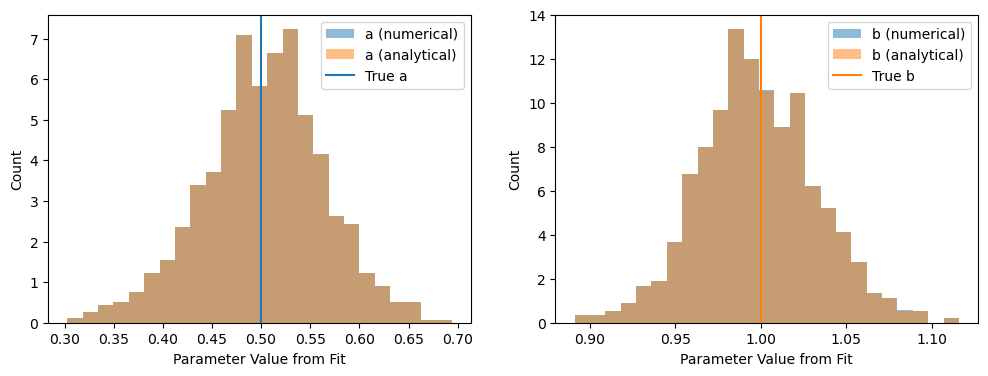

from estimator (numerical): a = 0.50 +/- 0.06
from estimator (numerical): b = 1.00 +/- 0.03
from estimator (analytical): a = 0.50 +/- 0.06
from estimator (analytical): b = 1.00 +/- 0.03
bias of a (numerical): 2.26e-03; analytical: 2.26e-03
bias of b (numerical): -1.68e-03; analytical: -1.68e-03


In [6]:
n_experiments = 1000
n = 10

a_values = np.zeros(n_experiments)
b_values = np.zeros(n_experiments)
a_values_ana = np.zeros(n_experiments)
b_values_ana = np.zeros(n_experiments)

a, b, sigma_x, sigma_y = 0.5, 1, 0.05, 0.05 # now sigma_x = 0.05


for i in range(n_experiments):
    x_, y_ = generate_data(10, a, b, sigma_x, sigma_y) # generate samples of n points 
    a_values[i], b_values[i] = minimize(Chi2, x0=(0, 0), args = (x_, y_, sigma_y)).x # find the best fit parameters for a and b
    a_values_ana[i], b_values_ana[i] = analytical_minimizer(x_, y_) # find the best fit parameters for a and b analytically
    
# plot the distribution of estimated a and b values
n_bins = 25

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(a_values, bins=n_bins, density=True, alpha=0.5, label='a (numerical)')
axs[0].hist(a_values_ana, bins=n_bins, density=True, alpha=0.5, label='a (analytical)')
axs[0].axvline(a, color='C0', label='True a')
axs[0].legend()
axs[1].hist(b_values, bins=n_bins, density=True, alpha=0.5, label='b (numerical)')
axs[1].hist(b_values_ana, bins=n_bins, density=True, alpha=0.5, label='b (analytical)')
axs[1].axvline(b, color='C1', label='True b')
axs[1].legend()

for ax in axs:
    ax.set_xlabel('Parameter Value from Fit')
    ax.set_ylabel('Count')
plt.show()

print('from estimator (numerical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values), np.std(a_values)))
print('from estimator (numerical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values), np.std(b_values)))
print('from estimator (analytical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values_ana), np.std(a_values_ana)))
print('from estimator (analytical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values_ana), np.std(b_values_ana)))

print(f"bias of a (numerical): {np.mean(a_values) - a:2.2e}; analytical: {np.mean(a_values_ana) - a:2.2e}")
print(f"bias of b (numerical): {np.mean(b_values) - b:2.2e}; analytical: {np.mean(b_values_ana) - b:2.2e}")

### increasing the x error

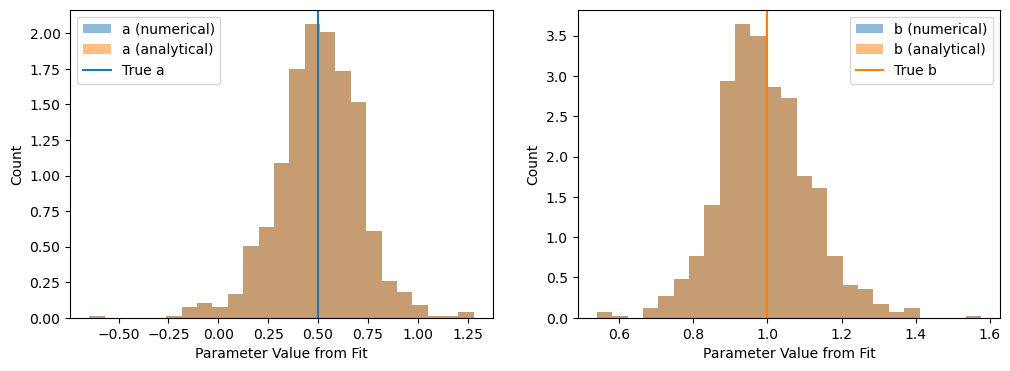

from estimator (numerical): a = 0.50 +/- 0.21
from estimator (numerical): b = 0.99 +/- 0.12
from estimator (analytical): a = 0.50 +/- 0.21
from estimator (analytical): b = 0.99 +/- 0.12
bias of a (numerical): 3.59e-03; analytical: 3.59e-03
bias of b (numerical): -8.06e-03; analytical: -8.06e-03


In [7]:
n_experiments = 1000
n = 10

a_values = np.zeros(n_experiments)
b_values = np.zeros(n_experiments)
a_values_ana = np.zeros(n_experiments)
b_values_ana = np.zeros(n_experiments)

a, b, sigma_x, sigma_y = 0.5, 1, 0.2, 0.2 # now sigma_x = 0.2 and sigma_y = 0.2


for i in range(n_experiments):
    x_, y_ = generate_data(10, a, b, sigma_x, sigma_y) # generate samples of n points 
    a_values[i], b_values[i] = minimize(Chi2, x0=(0, 0), args = (x_, y_, sigma_y)).x # find the best fit parameters for a and b
    a_values_ana[i], b_values_ana[i] = analytical_minimizer(x_, y_) # find the best fit parameters for a and b analytically
    
# plot the distribution of estimated a and b values
n_bins = 25

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(a_values, bins=n_bins, density=True, alpha=0.5, label='a (numerical)')
axs[0].hist(a_values_ana, bins=n_bins, density=True, alpha=0.5, label='a (analytical)')
axs[0].axvline(a, color='C0', label='True a')
axs[0].legend()
axs[1].hist(b_values, bins=n_bins, density=True, alpha=0.5, label='b (numerical)')
axs[1].hist(b_values_ana, bins=n_bins, density=True, alpha=0.5, label='b (analytical)')
axs[1].axvline(b, color='C1', label='True b')
axs[1].legend()

for ax in axs:
    ax.set_xlabel('Parameter Value from Fit')
    ax.set_ylabel('Count')
plt.show()

print('from estimator (numerical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values), np.std(a_values)))
print('from estimator (numerical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values), np.std(b_values)))
print('from estimator (analytical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values_ana), np.std(a_values_ana)))
print('from estimator (analytical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values_ana), np.std(b_values_ana)))

print(f"bias of a (numerical): {np.mean(a_values) - a:2.2e}; analytical: {np.mean(a_values_ana) - a:2.2e}")
print(f"bias of b (numerical): {np.mean(b_values) - b:2.2e}; analytical: {np.mean(b_values_ana) - b:2.2e}")

### increasing $n$

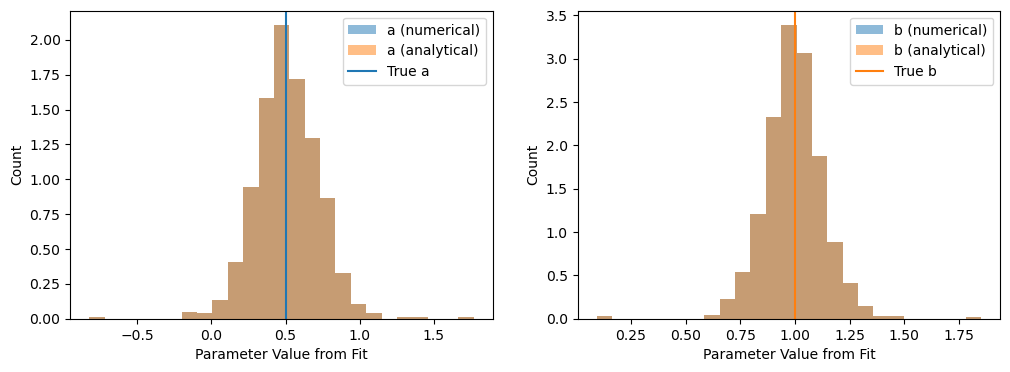

from estimator (numerical): a = 0.51 +/- 0.21
from estimator (numerical): b = 1.00 +/- 0.13
from estimator (analytical): a = 0.51 +/- 0.21
from estimator (analytical): b = 1.00 +/- 0.13
bias of a (numerical): 1.05e-02; analytical: 1.05e-02
bias of b (numerical): -4.28e-03; analytical: -4.28e-03


In [10]:
n_experiments = 1000
n = 200

a_values = np.zeros(n_experiments)
b_values = np.zeros(n_experiments)
a_values_ana = np.zeros(n_experiments)
b_values_ana = np.zeros(n_experiments)

a, b, sigma_x, sigma_y = 0.5, 1, 0.2, 0.2 # now sigma_x = 0.2 and sigma_y = 0.2


for i in range(n_experiments):
    x_, y_ = generate_data(10, a, b, sigma_x, sigma_y) # generate samples of n points 
    a_values[i], b_values[i] = minimize(Chi2, x0=(0, 0), args = (x_, y_, sigma_y)).x # find the best fit parameters for a and b
    a_values_ana[i], b_values_ana[i] = analytical_minimizer(x_, y_) # find the best fit parameters for a and b analytically
    
# plot the distribution of estimated a and b values
n_bins = 25

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(a_values, bins=n_bins, density=True, alpha=0.5, label='a (numerical)')
axs[0].hist(a_values_ana, bins=n_bins, density=True, alpha=0.5, label='a (analytical)')
axs[0].axvline(a, color='C0', label='True a')
axs[0].legend()
axs[1].hist(b_values, bins=n_bins, density=True, alpha=0.5, label='b (numerical)')
axs[1].hist(b_values_ana, bins=n_bins, density=True, alpha=0.5, label='b (analytical)')
axs[1].axvline(b, color='C1', label='True b')
axs[1].legend()

for ax in axs:
    ax.set_xlabel('Parameter Value from Fit')
    ax.set_ylabel('Count')
plt.show()

print('from estimator (numerical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values), np.std(a_values)))
print('from estimator (numerical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values), np.std(b_values)))
print('from estimator (analytical): a = {:.2f} +/- {:.2f}'.format(np.mean(a_values_ana), np.std(a_values_ana)))
print('from estimator (analytical): b = {:.2f} +/- {:.2f}'.format(np.mean(b_values_ana), np.std(b_values_ana)))

print(f"bias of a (numerical): {np.mean(a_values) - a:2.2e}; analytical: {np.mean(a_values_ana) - a:2.2e}")
print(f"bias of b (numerical): {np.mean(b_values) - b:2.2e}; analytical: {np.mean(b_values_ana) - b:2.2e}")

We conclude that the numerical and analytical minmizers function identically in all the above cases. Further, the estimator seems to unbiased since the distribtion of the estimator is centered at the true value of the parameter, and symmetric about it. But looking at the numerical values of the bias, it does not decrease with increasing $n$. We conclude that the while the bias is small, the estimator is still biased.